Dataset Source:

https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data

Github Repo:

https://github.com/ZSV-PROJECT/health-analysis/

In [662]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Gender:
 - Each row is categorised into either: Male, Female, Other
 - Since there are > 1000 entries in the dataset, it's probably fine if a row is miscategorised

In [663]:
# Change all male to Male
df.loc[df['Gender'].str.lower() == "male", 'Gender'] = "Male" 
df.loc[df['Gender'].str.lower() == "m", 'Gender'] = "Male"
df.loc[df['Gender'].str.lower() == "man", 'Gender'] = "Male"
df.loc[(df['Gender'].str.lower().isin(['ma'])) & (~df['Gender'].str.lower().isin(['fe'])), 'Gender'] = "Male"
# Change all female to Female
df.loc[df['Gender'].str.lower().isin(['fe']), 'Gender'] = "Female"
df.loc[df['Gender'].str.lower() == "female", 'Gender'] = "Female" 
df.loc[df['Gender'].str.lower() == "f", 'Gender'] = "Female"
df.loc[df['Gender'].str.lower() == "woman", 'Gender'] = "Female"

# Remove bogus entries
df = df.loc[~(df['Gender'].str.contains('A little about you')) & ~(df['Gender'].str.contains('p'))]

# Change all other to Other
df.loc[~df['Gender'].isin(['Male', 'Female']), 'Gender'] = "Other"

Age:
- Some ages were less than 0 and some were over 100
- These ages were converted into the average age of the entire dataset (exclusive)

In [664]:
# Fix bogus ages (avg)
df['Age'] = df['Age'].abs()
dfA = df.loc[(df['Age'] >= 0) & (df['Age'] <= 100)]
df.loc[(df['Age'] <= 0) | (df['Age'] >= 100), 'Age'] = dfA['Age'].mean()
del(dfA)

State:
- Rows can only have a state if the country is "United States"
- Replaced with NaN

In [665]:
# Fix bogus states
df.loc[~df['Country'].isin(['United States']), 'state'] = np.nan
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

Self-Employed
- NaN entries replaced with "No"

In [666]:
# Assume that NA for self-employed means No
df.loc[df['self_employed'].astype(str) == "nan", 'self_employed'] = "No"

Work Interfere
- NaN entries replaced with "N/A"

In [667]:
# Convert NaN to N/A
df.loc[df['work_interfere'].astype(str) == "nan", 'work_interfere'] = "N/A"

==========================================================================================================================================

Consequences for bringing up mental health conditions?
- Tech vs Non-tech company

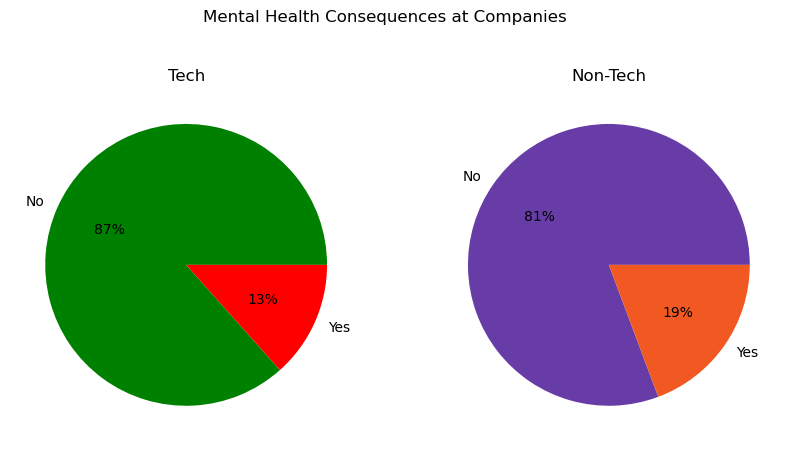

In [668]:
dfT = df.loc[(df['tech_company'] == "Yes")]
dfNT = df.loc[(df['tech_company'] == "No")]
fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].pie(dfT['obs_consequence'].value_counts(), labels=df['obs_consequence'].unique(), autopct="%1.0F%%", colors=["green", "red"],)
axs[0].set_title('Tech')
axs[1].pie(dfNT['obs_consequence'].value_counts(), labels=df['obs_consequence'].unique(), autopct="%1.0F%%", colors=["#683CA6", "#F25922"])
axs[1].set_title('Non-Tech')
fig.suptitle('Mental Health Consequences at Companies', y=0.75) #Asked ChatGPT how to remove the whitespace from adding title
plt.show()

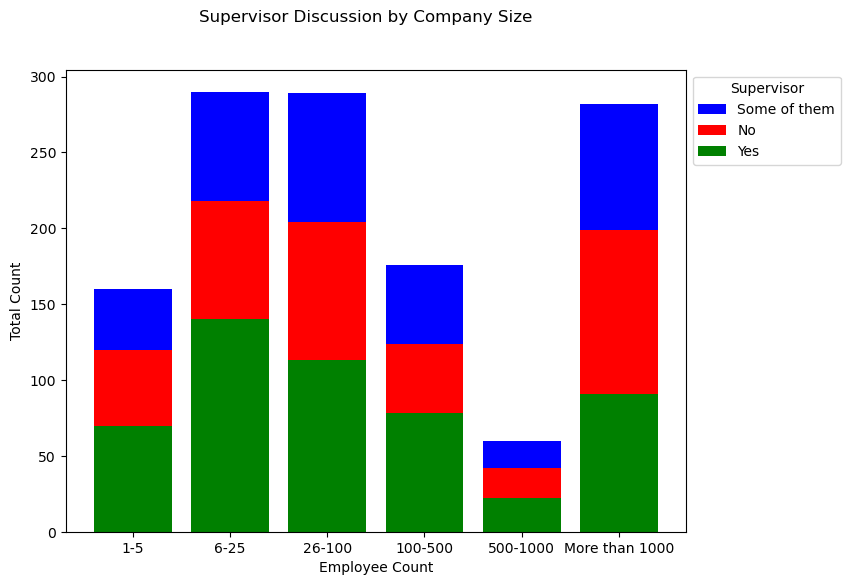

In [669]:
# Had to use ChatGPT
# "Help plt.bar(x=df['no_employees'], height=df['no_employees'].value_counts())"
# "How would i order X from least to greatest"
# "How to make stacked bar chart with yes, no, other from other column with legend"
# "It is overlaying over the chart, can i move it to the side a bit"

order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
df['no_employees'] = pd.Categorical(df['no_employees'], categories=order, ordered=True)
counts = df.groupby(['no_employees', 'supervisor']).size().unstack().fillna(0)
fig, axs = plt.subplots(figsize=(8,6))
bars_some = axs.bar(counts.index, counts['Some of them'], color='blue', bottom=counts['Yes'] + counts['No'], label='Some of them')
bars_no = axs.bar(counts.index, counts['No'], color='red', bottom=counts['Yes'], label='No')
bars_yes = axs.bar(counts.index, counts['Yes'], color='green', label='Yes')
axs.set_xlabel('Employee Count')
axs.set_ylabel('Total Count')
fig.suptitle('Supervisor Discussion by Company Size')
axs.legend(loc='upper left', title='Supervisor', bbox_to_anchor=(1, 1))
plt.show()

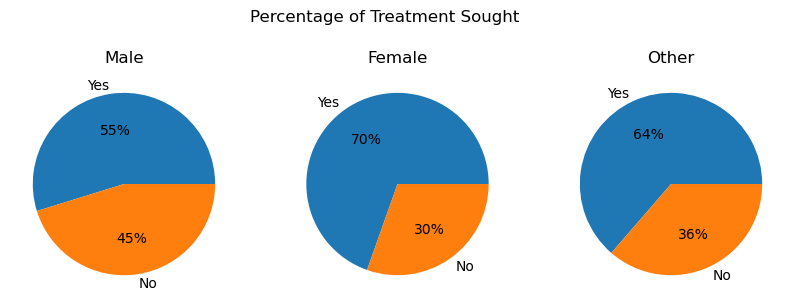

In [670]:
dfM = df.loc[(df['Gender'] == "Male")]
dfF = df.loc[(df['Gender'] == "Female")]
dfO = df.loc[(df['Gender'] == "Other")]
fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].pie(dfM['treatment'].value_counts(), labels=df['treatment'].unique(), autopct="%1.0F%%")
axs[0].set_title('Male')
axs[1].pie(dfF['treatment'].value_counts(), labels=df['treatment'].unique(), autopct="%1.0F%%")
axs[1].set_title('Female')
axs[2].pie(dfO['treatment'].value_counts(), labels=df['treatment'].unique(), autopct="%1.0F%%")
axs[2].set_title('Other')
fig.suptitle('Percentage of Treatment Sought', y=0.67)
plt.show()

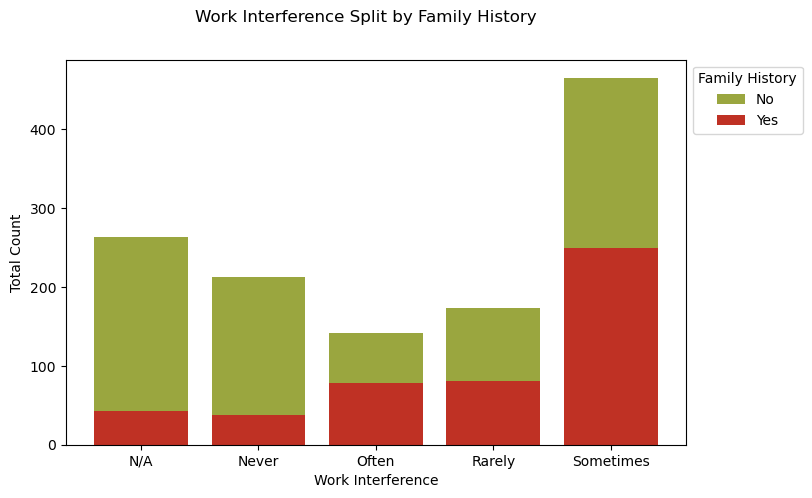

In [671]:
counts = df.groupby(['work_interfere', 'family_history']).size().unstack().fillna(0)
fig, axs = plt.subplots(figsize=(8,5))
bars_no = axs.bar(counts.index, counts['No'], bottom=counts['Yes'], label='No', color='#9AA63F')
bars_yes = axs.bar(counts.index, counts['Yes'], label='Yes', color='#BF3124')
axs.set_xlabel('Work Interference')
axs.set_ylabel('Total Count')
fig.suptitle('Work Interference Split by Family History')
axs.legend(loc='upper left', title='Family History', bbox_to_anchor=(1, 1))
plt.show()

Drop useless columns for prediction
- Timestamp
- Country
- State
- Comments


In [672]:
df = df.drop(columns=['Timestamp', 'Country','state','comments'])

In [673]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ChatGPT: "What if i want to use every column of the DF except for treatment to predict treatment"
X = df.drop('treatment', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 79.37%


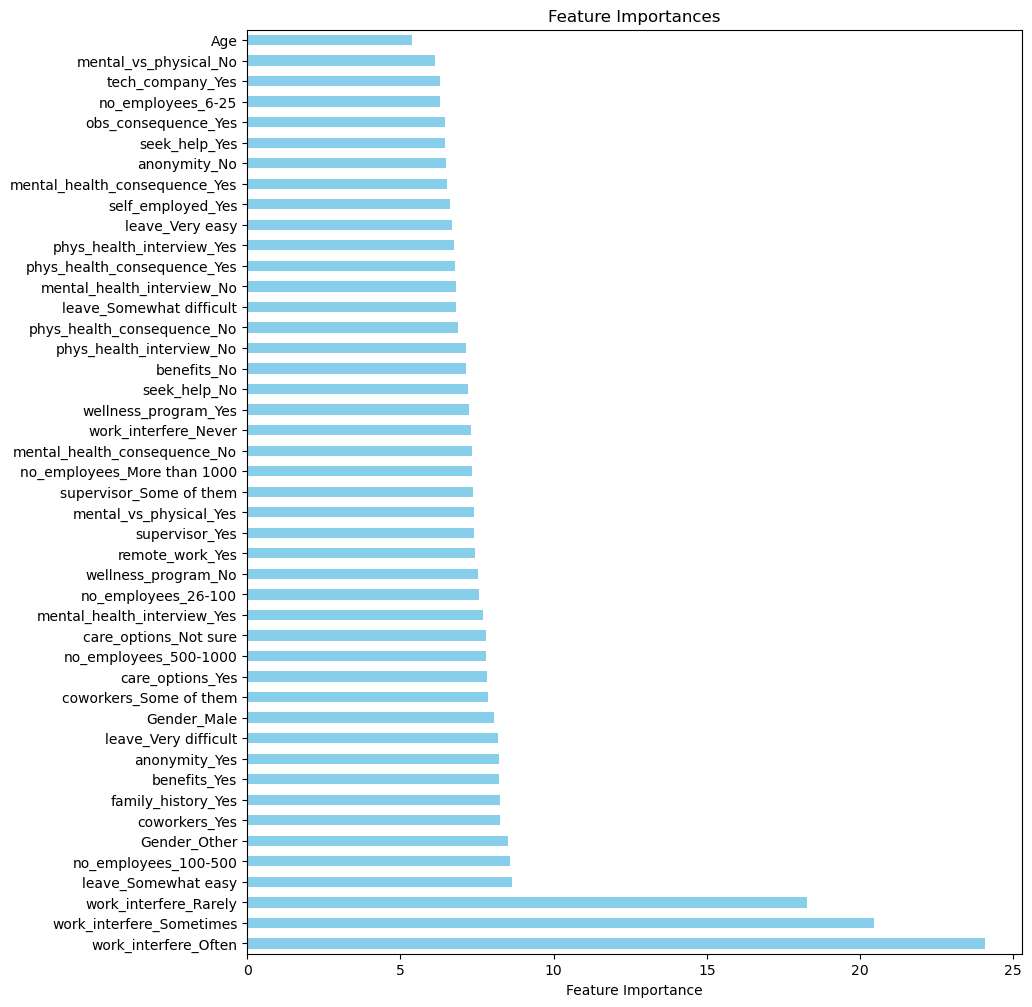

In [695]:
#ChatGPT: How could i see the most influential feature with a horizontal bar chart
feature_importances = abs(classifier.coefs_[0]).sum(axis=1)
weighted_list = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10, 12))
weighted_list.plot(kind='barh', ax=ax, color='skyblue')
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importances')

plt.show()